In [1]:
# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os
import re

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

In [2]:
# load the the main data sets
wideData = os.path.normpath("C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/wideDataforRollup.csv")
rollupData = pd.read_csv(wideData)

In [3]:
rollupData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141416 entries, 0 to 4141415
Data columns (total 43 columns):
Unnamed: 0                   int64
Dateopened                   object
Persontype                   object
Personcode                   int64
Channel                      object
State                        object
End_Date                     object
Observed                     int64
Cleancuststart               object
Custyears                    float64
Cleandateclosed              object
Productyears                 float64
Age                          float64
Customergroups               object
Closed                       int64
Auto                         float64
Business_Cd                  float64
Business_Checking            float64
Business_Money_Market        float64
Business_Odloc               float64
Business_Savings             float64
Cdira                        float64
Checking                     float64
Commercial_Loan              float64
Credit_Card    

In [4]:
# convert Personcode to a string

rollupData['Personcode'] = rollupData['Personcode'].astype(str)

In [5]:
# make the customer id by concatenating two strings

rollupData['CustID'] = rollupData['Persontype'] + rollupData['Personcode']

In [6]:
# create a in footprint test

def footprint_col(colCheck):
    
    footprint = ['ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    
    if colCheck in footprint:
        return('In')
    else:
        return('Out')

In [7]:
# now apply the function to create a new column called footprint

rollupData['Footprint'] = rollupData['State'].apply(footprint_col)

# need a lot of rows in head to make sure it all works then reset
rollupData.head()

,Unnamed: 0,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,...,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,CustID,Footprint
0,0,1989-11-29,F,354668,Branch,PA,2016-12-15,1,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F354668,In
1,1,1996-09-30,F,132166,Branch,PA,2016-12-15,1,1996-09-19,20.252055,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F132166,In
2,2,1999-03-26,F,5272647,Branch,PA,2016-12-15,1,1999-03-19,17.756164,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F5272647,In
3,3,2001-11-02,F,131869,Branch,PA,2016-12-15,1,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F131869,In
4,4,2001-11-02,F,1019639,Branch,PA,2016-12-15,1,2013-04-27,3.638356,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F1019639,In


In [8]:
# drop the unnamed column

rollupData.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
rollupData.head()

,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,Cleandateclosed,...,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,CustID,Footprint
0,1989-11-29,F,354668,Branch,PA,2016-12-15,1,NaN,NaN,2016-09-20,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F354668,In
1,1996-09-30,F,132166,Branch,PA,2016-12-15,1,1996-09-19,20.252055,2012-09-17,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F132166,In
2,1999-03-26,F,5272647,Branch,PA,2016-12-15,1,1999-03-19,17.756164,2010-12-14,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F5272647,In
3,2001-11-02,F,131869,Branch,PA,2016-12-15,1,NaN,NaN,2007-12-27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F131869,In
4,2001-11-02,F,1019639,Branch,PA,2016-12-15,1,2013-04-27,3.638356,2007-12-27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F1019639,In


In [10]:
rollupData.shape[0]

4141416

In [12]:
# now drop the null in place

rollupData['State'].isnull().sum()


116662

In [13]:
# fill the na with NonUS

rollupData.State = rollupData.State.fillna('NonUS')

In [15]:
rollupData.shape[0]

4141416

In [16]:
# need to remove the state with *******

# create the regex for the stars
patternDel = re.compile(r'^\*')

# then create the filter on the state column
filter = rollupData['State'].str.contains(patternDel)

# keep all items not in the filter
rollupData = rollupData[~filter]

In [17]:
rollupData['State'].unique()

array(['PA', 'MD', 'NJ', 'MA', 'WA', 'AZ', 'NC', 'DE', 'WI', 'WV', 'OR',
       'CA', 'TX', 'IL', 'VA', 'LA', 'IN', 'FL', 'NH', 'MI', 'MO', 'NonUS',
       'OH', 'NY', 'CO', 'GA', 'SC', 'MN', 'CT', 'RI', 'ME', 'PR', 'DC',
       'KY', 'AL', 'OK', 'NV', 'VT', 'ID', 'MT', 'IA', 'AK', 'TN', 'MS',
       'UT', 'NM', 'AR', 'ND', 'WY', 'NE', 'HI', 'KS', 'AP', 'AE', 'SD',
       'VI', 'GU', 'AA', 'MP'], dtype=object)

In [18]:
# get the closed dataset

# get the open and closed

closed = rollupData[rollupData['Closed'] == 1].copy()

closed.reset_index(drop = True)

,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,Cleandateclosed,...,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,CustID,Footprint
0,1989-11-29,F,354668,Branch,PA,2016-12-15,1,NaN,NaN,2016-09-20,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F354668,In
1,1996-09-30,F,132166,Branch,PA,2016-12-15,1,1996-09-19,20.252055,2012-09-17,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F132166,In
2,1999-03-26,F,5272647,Branch,PA,2016-12-15,1,1999-03-19,17.756164,2010-12-14,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F5272647,In
3,2001-11-02,F,131869,Branch,PA,2016-12-15,1,NaN,NaN,2007-12-27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F131869,In
4,2001-11-02,F,1019639,Branch,PA,2016-12-15,1,2013-04-27,3.638356,2007-12-27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F1019639,In
5,2004-06-18,F,1346577,Branch,PA,2016-12-15,1,2003-05-02,13.632877,2012-05-24,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F1346577,In
6,2003-04-30,F,142009,Branch,PA,2016-12-15,1,1994-08-10,22.364384,2013-01-28,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,F142009,In
7,1989-03-09,F,365510,Branch,PA,2016-12-15,1,1989-03-09,27.789041,2010-03-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F365510,In
8,1990-02-02,F,133201,Branch,PA,2016-12-15,1,1990-02-02,26.884932,2014-03-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F133201,In
9,1993-06-05,F,132956,Branch,PA,2016-12-15,1,1990-04-04,26.717808,2012-02-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F132956,In


In [19]:
closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668769 entries, 0 to 4141415
Data columns (total 44 columns):
Dateopened                   1654757 non-null object
Persontype                   1668769 non-null object
Personcode                   1668769 non-null object
Channel                      1668769 non-null object
State                        1668769 non-null object
End_Date                     1668769 non-null object
Observed                     1668769 non-null int64
Cleancuststart               1557445 non-null object
Custyears                    1557445 non-null float64
Cleandateclosed              1668769 non-null object
Productyears                 1654757 non-null float64
Age                          1668769 non-null float64
Customergroups               1667909 non-null object
Closed                       1668769 non-null int64
Auto                         1668769 non-null float64
Business_Cd                  1668769 non-null float64
Business_Checking            1668769

In [20]:
closed['Productyears'].isnull().sum()

# closed['Productyears'].describe()

14012

In [21]:
# remove the na's from product years

closed = closed[pd.notnull(closed['Productyears'])]

In [22]:
closed['Productyears'].describe()

count    1.654757e+06
mean     4.063936e+00
std      5.883748e+00
min     -5.315068e-01
25%      7.863014e-01
50%      1.890411e+00
75%      4.704110e+00
max      1.102055e+02
Name: Productyears, dtype: float64

In [23]:
# remove the negative 

closed = closed[closed['Productyears'] > 0 ]

In [24]:
# clean up the date opened will
# will need the date opened for checking in the window

closed['Dateopened'].head()

# first convert the date opened from an object

closed['Dateopened'] = pd.to_datetime(closed['Dateopened'], format='%Y-%m-%d')


In [25]:
closed.sort_values(by='Dateopened')

,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,Cleandateclosed,...,Locpersonal,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,CustID,Footprint
2792041,1901-01-01,F,151863,Branch,PA,2016-12-15,1,1901-01-01,116.032877,2011-02-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F151863,In
4138436,1908-01-01,F,1479342,Branch,MA,2016-12-15,1,1908-01-01,109.030137,2013-01-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F1479342,In
805553,1911-11-01,F,59901,Branch,NJ,2016-12-15,1,1911-11-01,105.194521,2010-10-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F59901,In
805696,1911-11-11,F,105460,Branch,NJ,2016-12-15,1,1911-11-11,105.167123,2011-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F105460,In
805695,1911-11-11,F,59700,Branch,NJ,2016-12-15,1,1911-11-11,105.167123,2011-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F59700,In
805680,1911-11-11,F,73177,Branch,NJ,2016-12-15,1,1911-11-11,105.167123,2014-09-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F73177,In
2391930,1913-04-01,F,815521,Branch,MA,2016-12-15,1,1913-04-01,103.778082,2014-01-27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F815521,In
1434874,1915-01-01,F,663818,Branch,MA,2016-12-15,1,1915-01-01,102.024658,2012-04-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F663818,In
3790362,1919-10-10,F,2424764,Branch,NY,2016-12-15,1,1919-10-10,97.249315,2010-10-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F2424764,In
1434823,1923-07-01,F,762200,Branch,MA,2016-12-15,1,1923-07-01,93.523288,2014-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F762200,In


In [26]:
# make a column for plotting later

closed['MonthYear'] = closed['Dateopened'].apply(lambda x: x.strftime('%b-%y'))

In [27]:
closed.sort_values(by='Dateopened')

,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,Cleandateclosed,...,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,CustID,Footprint,MonthYear
2792041,1901-01-01,F,151863,Branch,PA,2016-12-15,1,1901-01-01,116.032877,2011-02-18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F151863,In,Jan-01
4138436,1908-01-01,F,1479342,Branch,MA,2016-12-15,1,1908-01-01,109.030137,2013-01-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F1479342,In,Jan-08
805553,1911-11-01,F,59901,Branch,NJ,2016-12-15,1,1911-11-01,105.194521,2010-10-25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F59901,In,Nov-11
805696,1911-11-11,F,105460,Branch,NJ,2016-12-15,1,1911-11-11,105.167123,2011-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F105460,In,Nov-11
805695,1911-11-11,F,59700,Branch,NJ,2016-12-15,1,1911-11-11,105.167123,2011-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F59700,In,Nov-11
805680,1911-11-11,F,73177,Branch,NJ,2016-12-15,1,1911-11-11,105.167123,2014-09-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F73177,In,Nov-11
2391930,1913-04-01,F,815521,Branch,MA,2016-12-15,1,1913-04-01,103.778082,2014-01-27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F815521,In,Apr-13
1434874,1915-01-01,F,663818,Branch,MA,2016-12-15,1,1915-01-01,102.024658,2012-04-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F663818,In,Jan-15
3790362,1919-10-10,F,2424764,Branch,NY,2016-12-15,1,1919-10-10,97.249315,2010-10-18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F2424764,In,Oct-19
1434823,1923-07-01,F,762200,Branch,MA,2016-12-15,1,1923-07-01,93.523288,2014-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F762200,In,Jul-23


In [28]:
#select all of the checking accounts opened between jan 1 2014

recent = closed[(closed['Dateopened'] > '2013-12-31')]


In [29]:
recent.head(100)

,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,Cleandateclosed,...,Money_Market,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,CustID,Footprint,MonthYear
172,2014-01-23,F,1805229,Branch,PA,2016-12-15,1,1992-10-19,24.172603,2015-05-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F1805229,In,Jan-14
173,2014-01-23,F,1878064,Branch,PA,2016-12-15,1,1992-10-19,24.172603,2015-05-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F1878064,In,Jan-14
174,2014-01-23,F,1878064,Branch,PA,2016-12-15,1,1992-10-19,24.172603,2015-04-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F1878064,In,Jan-14
175,2014-02-10,F,132983,Branch,PA,2016-12-15,1,2000-02-08,16.863014,2015-09-29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F132983,In,Feb-14
176,2014-02-10,F,132983,Branch,PA,2016-12-15,1,2000-02-08,16.863014,2015-09-29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F132983,In,Feb-14
179,2014-02-26,F,365510,Branch,PA,2016-12-15,1,1989-03-09,27.789041,2016-07-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F365510,In,Feb-14
180,2014-02-26,F,365510,Branch,PA,2016-12-15,1,1989-03-09,27.789041,2016-07-18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F365510,In,Feb-14
181,2014-03-05,F,355183,Branch,PA,2016-12-15,1,2005-02-25,11.810959,2015-06-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F355183,In,Mar-14
182,2014-03-05,F,355183,Branch,PA,2016-12-15,1,2005-02-25,11.810959,2015-06-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F355183,In,Mar-14
184,2014-03-25,F,133139,Branch,PA,2016-12-15,1,1997-05-12,19.608219,2015-05-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F133139,In,Mar-14


In [30]:
recent = recent.sort_values(by='Dateopened')

recent = recent.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

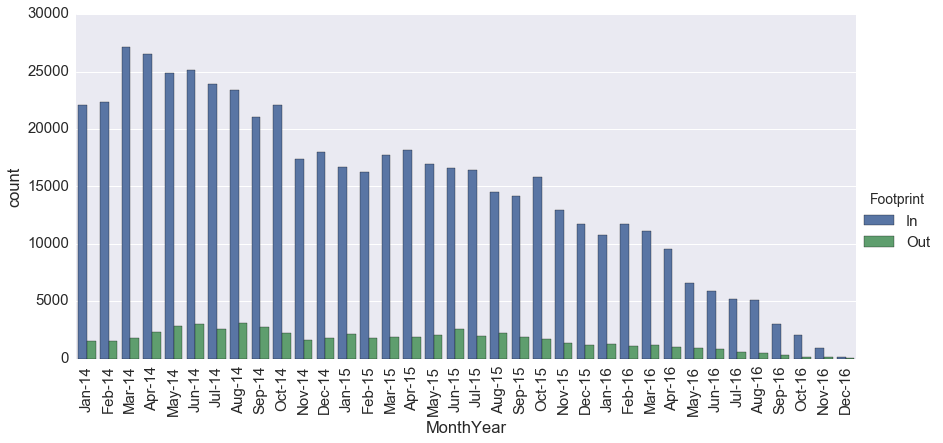

In [31]:
# get a plot of closures by month
# data is from Jan 1 2014 onward
# includes all types of accounts

sns.set(font_scale=1.5)

sns.factorplot(x = 'MonthYear', data = recent, kind = 'count', legend = 'True', hue = 'Footprint', size = 6, aspect = 2)
plt.xticks(rotation=90)

C:\Users\n846490\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


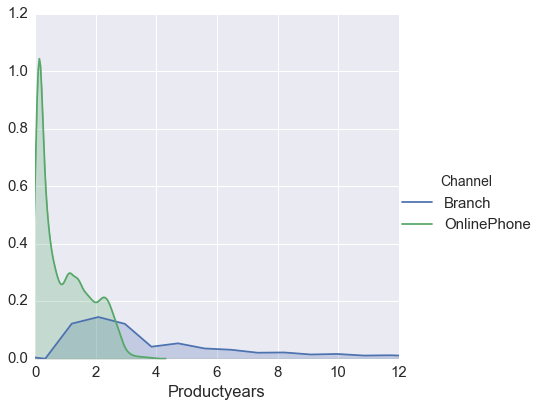

In [32]:
# try a histogram
# all products by channel
# shows all products with a date closed

sns.set(font_scale=1.5)

fig = sns.FacetGrid(data=closed, hue='Channel', size = 6)

fig.map(sns.kdeplot,'Productyears', shade = True)

fig.set(xlim=(0,12))

fig.add_legend(title='Channel')

C:\Users\n846490\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


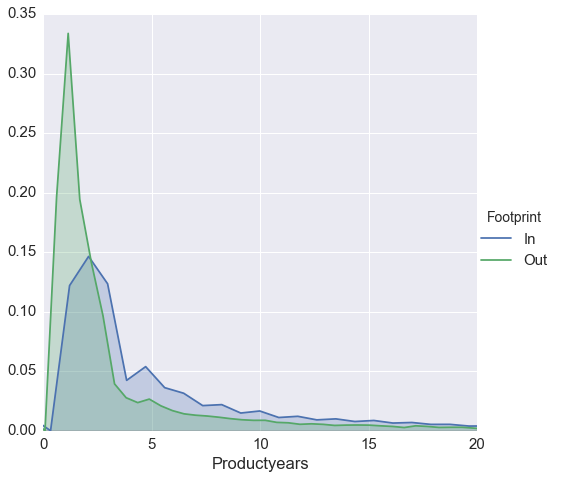

In [33]:
# try a histogram
# all products and lifecycle by footprint

sns.set(font_scale=1.5)

fig = sns.FacetGrid(data=closed, hue='Footprint', size = 7)

fig.map(sns.kdeplot,'Productyears', shade = True)

fig.set(xlim=(0,20))

fig.add_legend(title='Footprint')

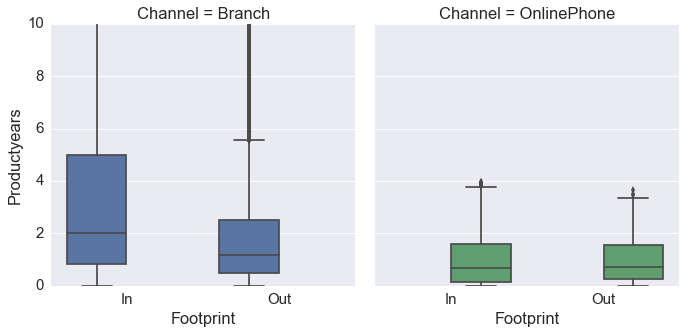

In [35]:
# compare witha  boxpolot
# all products with a closed date
# footprint is not a significant factor

p = sns.factorplot(data = closed, x = 'Footprint', col = 'Channel', y = 'Productyears', hue = 'Channel', kind = 'box', size= 5)
p.set(ylim=(0, 10))

In [36]:
recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592244 entries, 0 to 592243
Data columns (total 46 columns):
index                        592244 non-null int64
Dateopened                   592244 non-null datetime64[ns]
Persontype                   592244 non-null object
Personcode                   592244 non-null object
Channel                      592244 non-null object
State                        592244 non-null object
End_Date                     592244 non-null object
Observed                     592244 non-null int64
Cleancuststart               575950 non-null object
Custyears                    575950 non-null float64
Cleandateclosed              592244 non-null object
Productyears                 592244 non-null float64
Age                          592244 non-null float64
Customergroups               591413 non-null object
Closed                       592244 non-null int64
Auto                         592244 non-null float64
Business_Cd                  592244 non-null flo

In [37]:
# slice the checking data to checking only
# slice creates a dataset of 221,528 records

checking = closed[(closed['Checking'] == 1)]

In [38]:
# get a count of the checking in the closed

checking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471171 entries, 340 to 4140942
Data columns (total 45 columns):
Dateopened                   471171 non-null datetime64[ns]
Persontype                   471171 non-null object
Personcode                   471171 non-null object
Channel                      471171 non-null object
State                        471171 non-null object
End_Date                     471171 non-null object
Observed                     471171 non-null int64
Cleancuststart               450589 non-null object
Custyears                    450589 non-null float64
Cleandateclosed              471171 non-null object
Productyears                 471171 non-null float64
Age                          471171 non-null float64
Customergroups               470627 non-null object
Closed                       471171 non-null int64
Auto                         471171 non-null float64
Business_Cd                  471171 non-null float64
Business_Checking            471171 non-nul

C:\Users\n846490\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


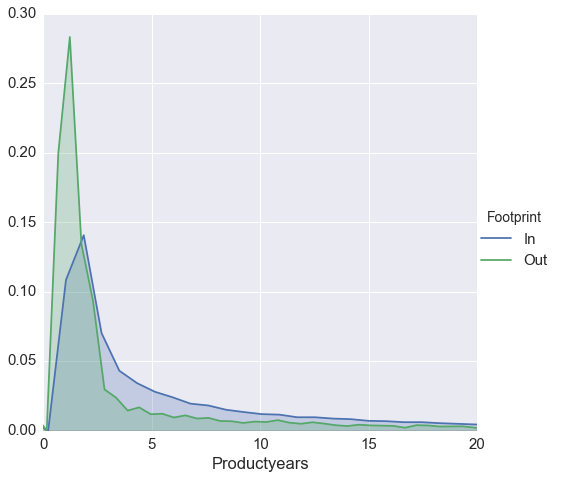

In [39]:
# try a histogram
# checking only lifecycle by footprint

sns.set(font_scale=1.5)

fig = sns.FacetGrid(data=checking, hue='Footprint', size = 7)

fig.map(sns.kdeplot,'Productyears', shade = True)

fig.set(xlim=(0,20))

fig.add_legend(title='Footprint')

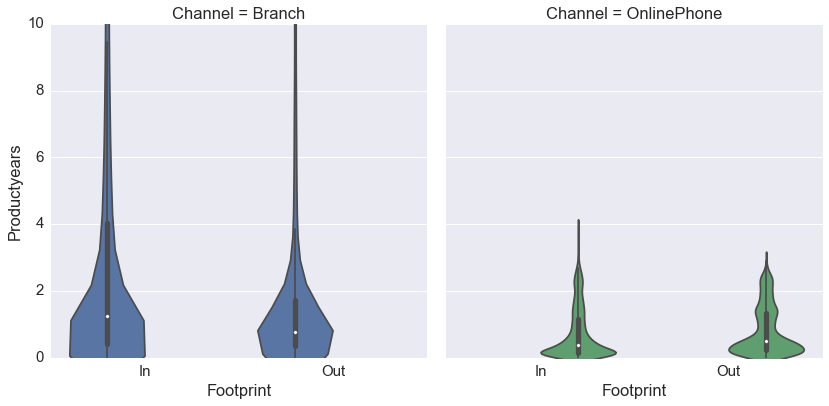

In [40]:
p = sns.factorplot(data = checking, x = 'Footprint', col = 'Channel', y = 'Productyears', hue = 'Channel', kind = 'violin', size= 6)
p.set(ylim=(0, 10))

In [41]:
# need to reduce the time period for checking
# get the data
recentChecking = checking[(checking['Dateopened'] > '2013-12-31')]

# sort it for plotting
recentChecking = recentChecking.sort_values(by='Dateopened')

# reset the index
recentChecking = recentChecking.reset_index()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

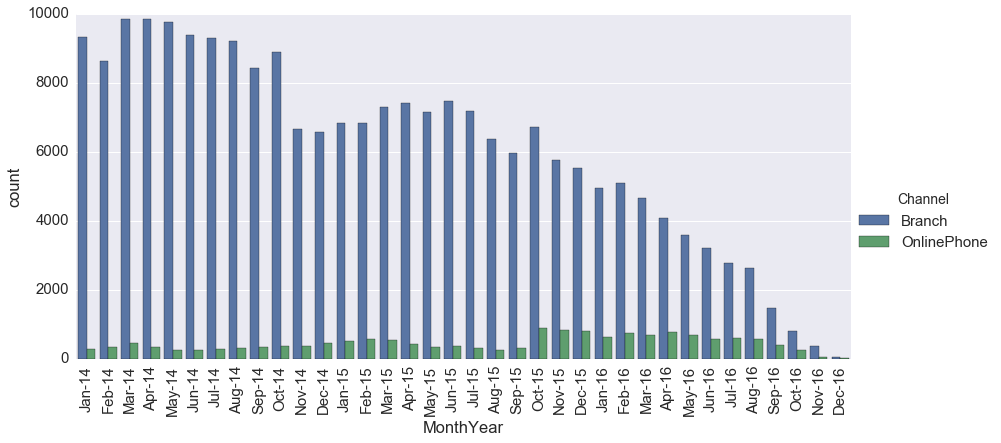

In [42]:
sns.set(font_scale=1.5)

sns.factorplot(x = 'MonthYear', data = recentChecking, kind = 'count', legend = 'True', hue = 'Channel', size = 6, aspect = 2)
plt.xticks(rotation=90)

C:\Users\n846490\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


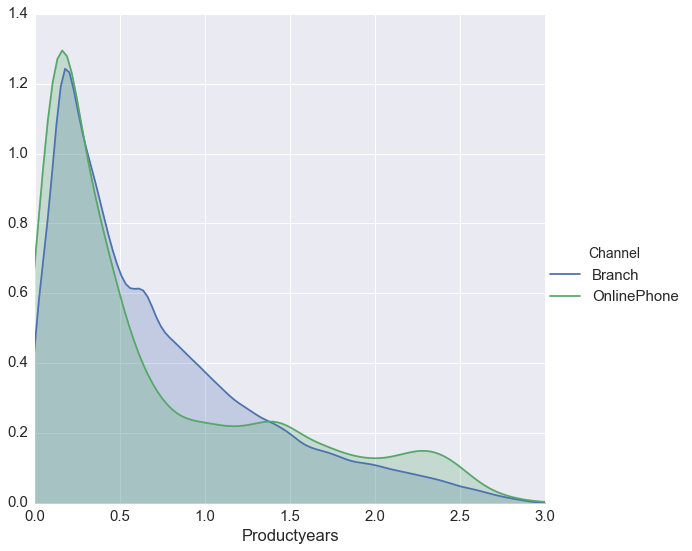

In [43]:
# try a histogram
# this is for checking data only
# includes all periods

sns.set(font_scale=1.5)

fig = sns.FacetGrid(data=recentChecking, hue='Channel', size = 8)

fig.map(sns.kdeplot,'Productyears', shade = True)

fig.set(xlim=(0,3))

fig.add_legend(title='Channel')

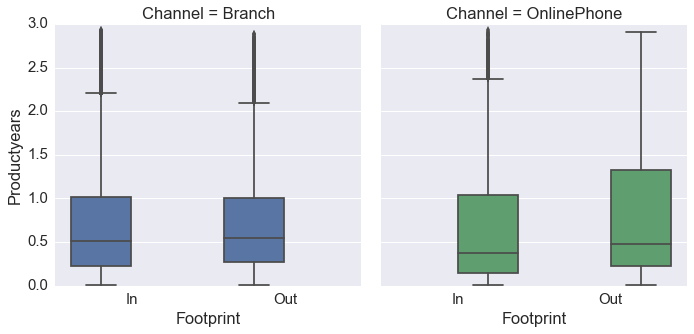

In [44]:
# original boxplot
# recent checking data only

sns.factorplot(data = recentChecking, x = 'Footprint', col = 'Channel', y = 'Productyears', hue = 'Channel', kind = 'box', size= 5)

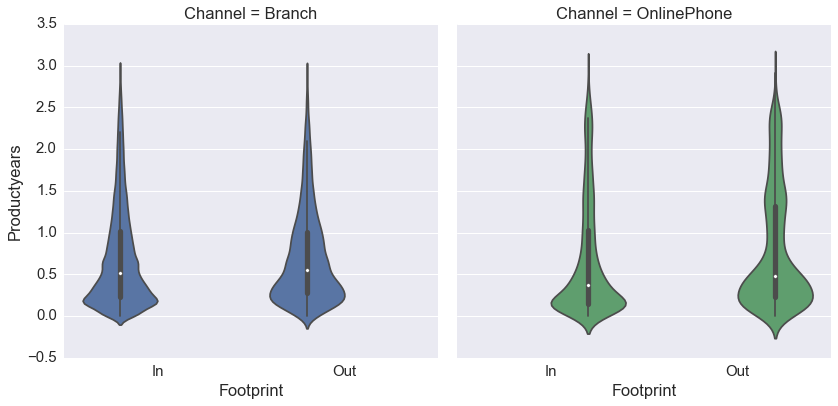

In [45]:

# original boxplot
# sns.factorplot(data = checking, x= 'Footprint', col = 'Channel', y = 'Productyears', hue = 'Channel', kind = 'box', size= 6)

# sns.boxplot(x="Productyears", y="Footprint", data=checking, hue = 'Channel')

# Add in points to show each observation
sns.factorplot(y="Productyears", x="Footprint", data=recentChecking, hue = 'Channel', kind = 'violin', size = 6, col = 'Channel')


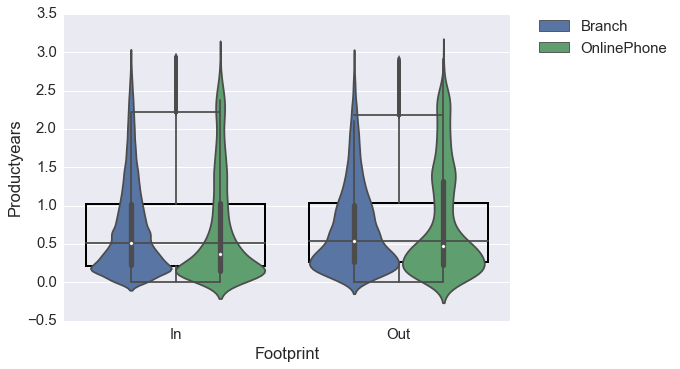

In [46]:

ax = sns.boxplot(x='Footprint', y='Productyears', data=recentChecking)

plt.setp(ax.artists, alpha= 1, linewidth=2, fill=False, edgecolor="k")

sns.violinplot(x='Footprint', y='Productyears', alpha = .6,data=recentChecking, edgecolor='gray', hue = 'Channel', legend = False)

# plt.legend(loc='upper center')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

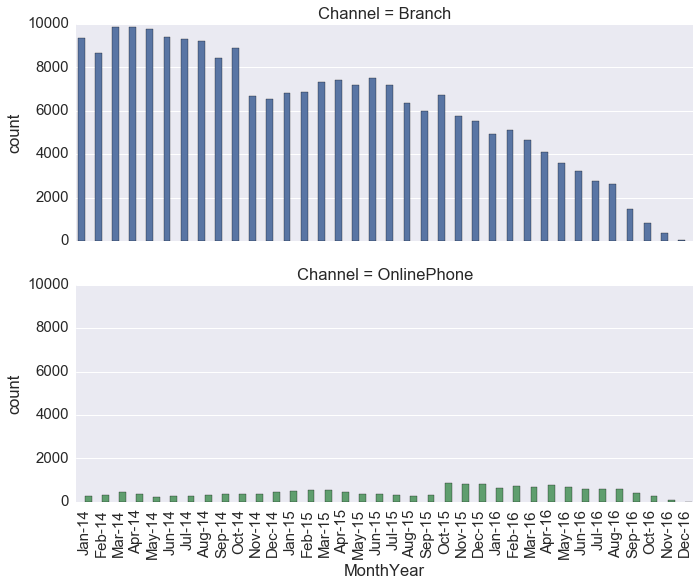

In [48]:
# get a plot of closures by month opened

sns.set(font_scale=1.5)

sns.factorplot(x = 'MonthYear', data = recentChecking, kind = 'count', legend = 'True', row = 'Channel', hue = 'Channel', size = 4, aspect = 2.5)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

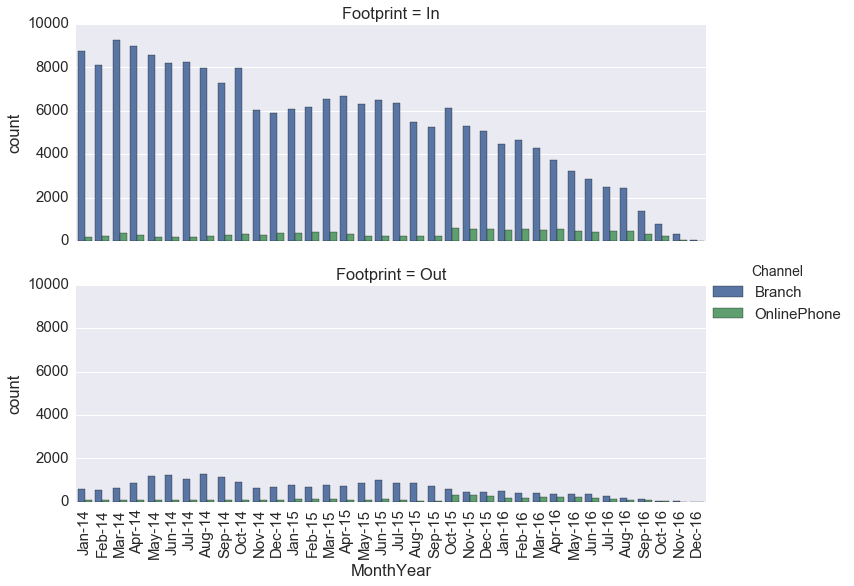

In [49]:
# get a plot of closures by month opened
# recent checking only

sns.set(font_scale=1.5)

sns.factorplot(x = 'MonthYear', data = recentChecking, kind = 'count', legend = 'True', row = 'Footprint', hue = 'Channel', size = 4, aspect = 2.5)
plt.xticks(rotation=90)

In [50]:
# get a better view of out of footprint

outFoot = recentChecking[(recentChecking['Footprint'] == 'Out')]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

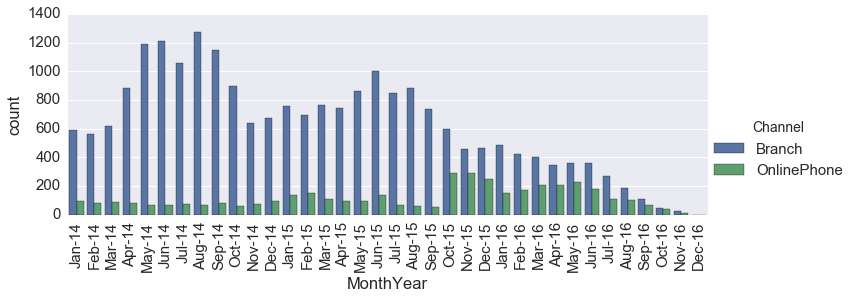

In [51]:
# get a plot of closures by month opened

sns.set(font_scale=1.5)

sns.factorplot(x = 'MonthYear', data = outFoot, kind = 'count', legend = 'True', hue = 'Channel', size = 4, aspect = 2.5)
plt.xticks(rotation=90)

In [58]:
rollupData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140880 entries, 0 to 4141415
Data columns (total 44 columns):
Dateopened                   datetime64[ns]
Persontype                   object
Personcode                   object
Channel                      object
State                        object
End_Date                     object
Observed                     int64
Cleancuststart               object
Custyears                    float64
Cleandateclosed              object
Productyears                 float64
Age                          float64
Customergroups               object
Closed                       int64
Auto                         float64
Business_Cd                  float64
Business_Checking            float64
Business_Money_Market        float64
Business_Odloc               float64
Business_Savings             float64
Cdira                        float64
Checking                     float64
Commercial_Loan              float64
Credit_Card                  float64
Comm

In [56]:
# first convert the date opened from an object

rollupData['Dateopened'] = pd.to_datetime(rollupData['Dateopened'], format='%Y-%m-%d')

In [60]:
rollupData = rollupData[pd.notnull(rollupData['Dateopened'])]

In [61]:
# make a column for plotting later

rollupData['MonthYear'] = rollupData['Dateopened'].apply(lambda x: x.strftime('%b-%y'))

In [62]:
# sort it

rollupData = rollupData.sort_values(by='Dateopened')

rollupData = rollupData.reset_index()

In [63]:
# slice the rollup data so that it is closed and checking

openChecking = rollupData[(rollupData['Checking'] == 1) & (rollupData['Closed'] == 0)]

In [64]:
# get the more recent data

recentOpen = openChecking[(openChecking['Dateopened'] > '2013-12-31')]

In [65]:
recentOpen.shape[0]

543935

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

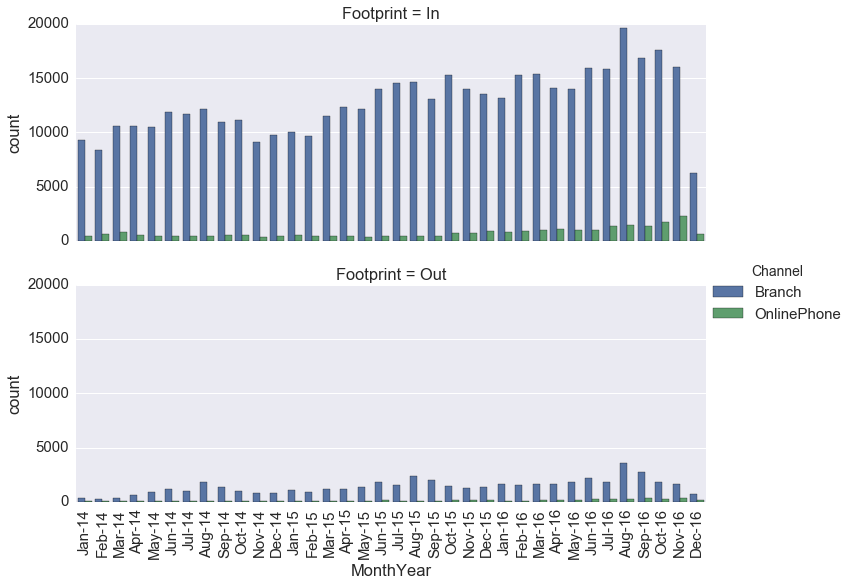

In [66]:
# get a plot of openings by month year opened

sns.set(font_scale=1.5)

sns.factorplot(x = 'MonthYear', data = recentOpen, kind = 'count', legend = 'True', hue = 'Channel', row = 'Footprint', size = 4, aspect = 2.5)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

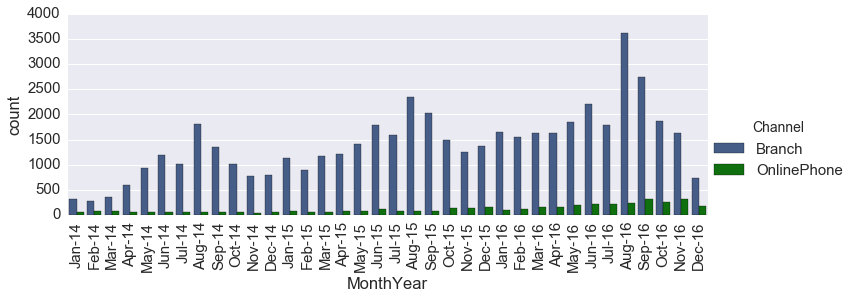

In [79]:
# get a better view of out of footprint

outFoot = recentOpen[(recentOpen['Footprint'] == 'Out')]

p = sns.factorplot(x = 'MonthYear', data = outFoot, kind = 'count', legend = 'True', hue = 'Channel', size = 4, aspect = 2.5,
                   palette={'Branch': sns.xkcd_rgb['denim blue'], 'OnlinePhone': 'g'}, hue_order = ['Branch', 'OnlinePhone'])

plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

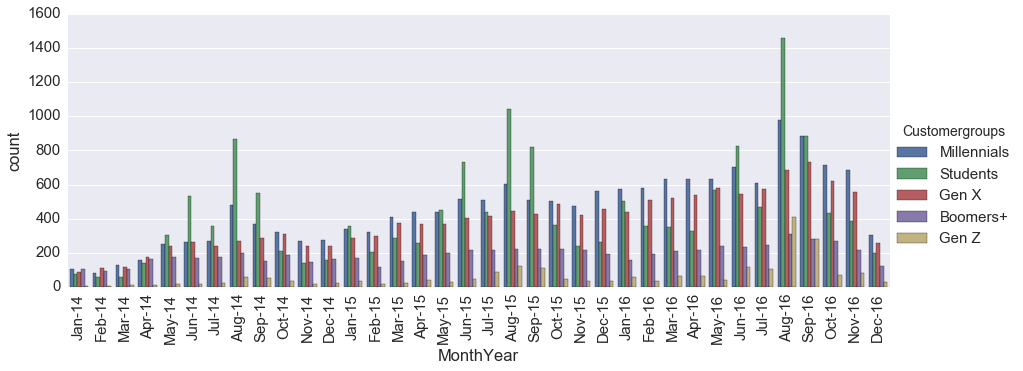

In [80]:
# try to plot by customer groups

p = sns.factorplot(x = 'MonthYear', data = outFoot, kind = 'count', legend = 'True', hue = 'Customergroups', size = 5, aspect = 2.5)

plt.xticks(rotation=90)


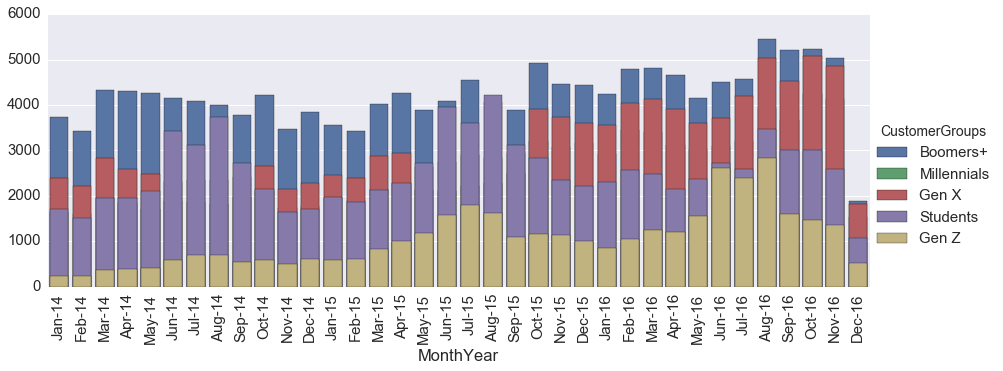

In [110]:
inFoot = recentOpen[(recentOpen['Footprint'] == 'In')]

# g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
# g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

# p = sns.countplot(x = 'MonthYear', data = outFoot, hue = 'Customergroups')

# plt.xticks(rotation=90)

sns.set(font_scale=1.5)

fig = sns.FacetGrid(data=inFoot, hue='Customergroups', size = 5, aspect = 2.5)

fig.map(sns.countplot,'MonthYear')

plt.xticks(rotation=90)

fig.add_legend(title='CustomerGroups')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

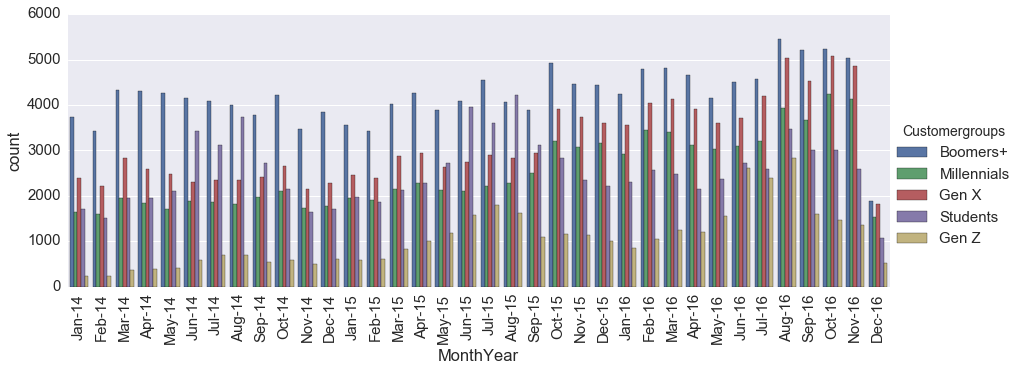

In [111]:
# try to plot by customer groups

p = sns.factorplot(x = 'MonthYear', data = inFoot, kind = 'count', legend = 'True', hue = 'Customergroups', size = 5, aspect = 2.5)

plt.xticks(rotation=90)

In [117]:
rollupData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4125509 entries, 0 to 4125508
Data columns (total 45 columns):
Dateopened                   datetime64[ns]
Persontype                   object
Personcode                   object
Channel                      object
State                        object
End_Date                     object
Observed                     int64
Cleancuststart               object
Custyears                    float64
Cleandateclosed              object
Productyears                 float64
Age                          float64
Customergroups               object
Closed                       int64
Auto                         float64
Business_Cd                  float64
Business_Checking            float64
Business_Money_Market        float64
Business_Odloc               float64
Business_Savings             float64
Cdira                        float64
Checking                     float64
Commercial_Loan              float64
Credit_Card                  float64
Comm

In [115]:
rollupData.drop('index', axis=1, inplace=True)

In [118]:
# now sum across the rollupDataState
# NumProducts is number of products open


rollupData['NumProducts'] = rollupData.ix[:, 14:42].sum(axis = 1)

In [120]:
rollupData['NumProducts'].describe()

count    4125509.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: NumProducts, dtype: float64

In [121]:
rollupData.head()

,Dateopened,Persontype,Personcode,Channel,State,End_Date,Observed,Cleancuststart,Custyears,Cleandateclosed,...,Mortgage,Odloc,Other,Other_Loan,Safe_Box,Savings,CustID,Footprint,MonthYear,NumProducts
0,1901-01-01,F,151863,Branch,PA,2016-12-15,1,1901-01-01,116.032877,2011-02-18,...,0.0,0.0,0.0,0.0,0.0,1.0,F151863,In,Jan-01,1.0
1,1908-01-01,F,1479342,Branch,MA,2016-12-15,1,1908-01-01,109.030137,2013-01-02,...,0.0,0.0,0.0,0.0,0.0,0.0,F1479342,In,Jan-08,1.0
2,1911-11-01,F,59901,Branch,NJ,2016-12-15,1,1911-11-01,105.194521,2010-10-25,...,0.0,0.0,0.0,0.0,0.0,0.0,F59901,In,Nov-11,1.0
3,1911-11-11,F,105460,Branch,NJ,2016-12-15,1,1911-11-11,105.167123,2011-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,F105460,In,Nov-11,1.0
4,1911-11-11,F,73177,Branch,NJ,2016-12-15,1,1911-11-11,105.167123,2014-09-15,...,0.0,0.0,0.0,0.0,0.0,0.0,F73177,In,Nov-11,1.0


In [122]:
# check the working directory

os.getcwd()

'C:\\Users\\n846490\\Documents\\Python Scripts\\SurvivalAnalysis'

In [124]:
# write this to a csv for additional cleaning
# export the clean data

rollupData.to_csv('DataForRollupCleanState.csv')